In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline

# San Jose Vehicle Data

In [2]:
# Data URL https://data.sanjoseca.gov/dataset/crashes-data/resource/8f97060e-9899-42c8-a7ef-8b441e1fa6a9

df = pd.read_csv("https://data.sanjoseca.gov/dataset/918fb7f0-60c0-484e-b31c-334d1ec74e92/resource/8f97060e-9899-42c8-a7ef-8b441e1fa6a9/download/vehiclecrashdata2011-2020.csv")

In [3]:
df.shape

(115302, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115302 entries, 0 to 115301
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CrashName                   115302 non-null  object 
 1   Name                        115302 non-null  object 
 2   Sex                         85276 non-null   object 
 3   Age                         115302 non-null  int64  
 4   Speed                       50770 non-null   float64
 5   VehicleDamage               115302 non-null  object 
 6   PartyCategory               115302 non-null  object 
 7   Sobriety                    115302 non-null  object 
 8   VehicleDirection            115302 non-null  object 
 9   MovementPrecedingCollision  115302 non-null  object 
 10  PartyType                   115302 non-null  object 
 11  OtherAssociatedFactor       115302 non-null  object 
 12  VehicleCount                115302 non-null  int64  
 13  ViolationCode 

In [5]:
df.head()

,CrashName,Name,Sex,Age,Speed,VehicleDamage,PartyCategory,Sobriety,VehicleDirection,MovementPrecedingCollision,PartyType,OtherAssociatedFactor,VehicleCount,ViolationCode,ViolationCodeDescription
0,CR-0000063652,ACV-0000000030,M,0,NaN,Minor,Driver,Impairment Not Known,East,Proceeding Straight,Car,Unknown,1,00001,Other Improper Driving
1,CR-0000068628,ACV-0000000031,NaN,0,NaN,Unknown,Driver,Impairment Not Known,Unknown,Backing,Unknown,Inattention,1,00001,Other Improper Driving
2,CR-0000064498,ACV-0000000032,F,50,NaN,Minor,Driver,Had Not Been Drinking,South,Parking Maneuver,Car,Unknown,1,00001,Other Improper Driving
3,CR-0000068721,ACV-0000000033,M,19,NaN,Minor,Driver,Had Not Been Drinking,North,Proceeding Straight,Car,Inattention,1,00001,Other Improper Driving
4,CR-0000064227,ACV-0000000034,M,16,NaN,Unknown,Driver,Had Not Been Drinking,East,Making Left Turn,Car,None Apparent,1,00001,Other Improper Driving


In [6]:
#df.isnull().sum()/len(df)*100

In [7]:
#print(df['CrashName'].value_counts())
#print('_____________'*20)
#print(df['Name'].value_counts())

In [8]:
#df[df['CrashName'] == 'CR-0000051730']

In [9]:
#df[df['CrashName'] == 'CR-0000074705']

In [10]:
df.shape

(115302, 15)

In [11]:
df['PartyCategory'].value_counts()

Driver        90900
Parked        17107
Bicycle        3357
Pedestrian     2967
Unknown         772
Other           199
Name: PartyCategory, dtype: int64

In [12]:
#df = df[df['PartyCategory'] == 'Driver']

We drop duplicates so that we get the data for the vehicles that cause the accidents rather than the others. 
From the above we can see that the first record consists of driver details and the rest are parked vehicles. We require driver details. Hence we keep first.

In [13]:
df.drop_duplicates(subset="CrashName",keep= 'first', inplace=True) 

In [14]:
df.reset_index(inplace = True)
df.drop('index',axis = 1, inplace = True)

In [15]:
df.shape

(56033, 15)

In [16]:
#print(df['CrashName'].value_counts())

In [17]:
missing_vals = df.isna().sum()/len(df)*100
missing_vals = missing_vals[missing_vals > 0]
print('Percentage of Missing Values:')
print(missing_vals)
print()
print('Sex')
print(df['Sex'].value_counts(normalize=True))
print()
print(df['Sex'].value_counts())

Percentage of Missing Values:
Sex      22.467118
Speed    55.613656
dtype: float64

Sex
M    0.654912
F    0.345088
Name: Sex, dtype: float64

M    28452
F    14992
Name: Sex, dtype: int64


### 4% missing values for Sex. Will be replace by Sex_Unknown. However, we will drop Speed since it has more than 99% missing.

In [18]:
df["Sex"]=df["Sex"].replace(np.NaN, "Sex_Unknown")
one_hot_pc = pd.get_dummies(df["Sex"])
df = df.drop('Sex',axis = 1)
df = df.join(one_hot_pc)

In [19]:
df.head()

,CrashName,Name,Age,Speed,VehicleDamage,PartyCategory,Sobriety,VehicleDirection,MovementPrecedingCollision,PartyType,OtherAssociatedFactor,VehicleCount,ViolationCode,ViolationCodeDescription,F,M,Sex_Unknown
0,CR-0000063652,ACV-0000000030,0,NaN,Minor,Driver,Impairment Not Known,East,Proceeding Straight,Car,Unknown,1,00001,Other Improper Driving,0,1,0
1,CR-0000068628,ACV-0000000031,0,NaN,Unknown,Driver,Impairment Not Known,Unknown,Backing,Unknown,Inattention,1,00001,Other Improper Driving,0,0,1
2,CR-0000064498,ACV-0000000032,50,NaN,Minor,Driver,Had Not Been Drinking,South,Parking Maneuver,Car,Unknown,1,00001,Other Improper Driving,1,0,0
3,CR-0000068721,ACV-0000000033,19,NaN,Minor,Driver,Had Not Been Drinking,North,Proceeding Straight,Car,Inattention,1,00001,Other Improper Driving,0,1,0
4,CR-0000064227,ACV-0000000034,16,NaN,Unknown,Driver,Had Not Been Drinking,East,Making Left Turn,Car,None Apparent,1,00001,Other Improper Driving,0,1,0


### Moving on to Age, this should be a discrete variable in the 0-100 range, maybe higher if there are some really old people driving. The distribution of involved parties should be realtively normal, maybe left skewed slightly due to higher impulsivity and less experience in younger drivers. 

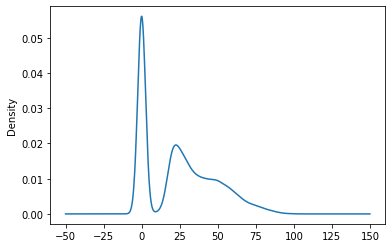

In [20]:
df['Age'].plot(kind='kde')

In [21]:
print()
print('Age')
print(df['Age'].value_counts(normalize=True))
print()
print(df['Age'].value_counts())


Age
0      0.363536
22     0.021987
20     0.021630
21     0.021130
23     0.020381
         ...   
5      0.000089
96     0.000054
1      0.000036
100    0.000036
99     0.000018
Name: Age, Length: 101, dtype: float64

0      20370
22      1232
20      1212
21      1184
23      1142
       ...  
5          5
96         3
1          2
100        2
99         1
Name: Age, Length: 101, dtype: int64


In [22]:
#We can see above that for same crashname there are age = 0 instances
df1 = df[df.Age == 0]
df = df[df.Age != 0] #new dataframe which age != 0

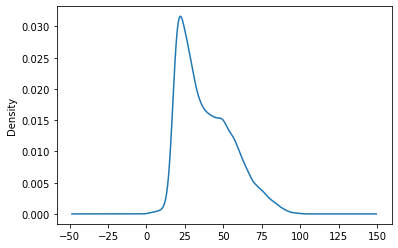

In [23]:
df['Age'].plot(kind='kde')

In [24]:
print()
print('Age')
print(df['Age'].value_counts(normalize=True))
print()
print(df['Age'].value_counts())


Age
22     0.034546
20     0.033985
21     0.033200
23     0.032022
24     0.030452
         ...   
5      0.000140
96     0.000084
1      0.000056
100    0.000056
99     0.000028
Name: Age, Length: 100, dtype: float64

22     1232
20     1212
21     1184
23     1142
24     1086
       ... 
5         5
96        3
1         2
100       2
99        1
Name: Age, Length: 100, dtype: int64


### Age has noisy data such as Age < 16 which need to be treated.

In [25]:
df.shape

(35663, 17)

In [26]:
df = df[df.Age >15]

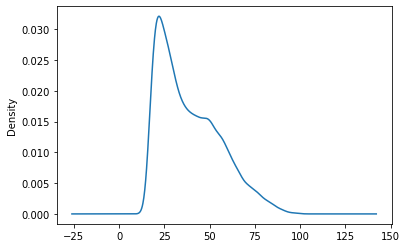

In [27]:
df['Age'].plot(kind='kde')

In [28]:
df.shape

(35158, 17)

In [29]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [30]:

print('Age')
print(df['Age'].value_counts())

Age
22     1232
20     1212
21     1184
23     1142
24     1086
       ... 
94        7
97        6
96        3
100       2
99        1
Name: Age, Length: 85, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


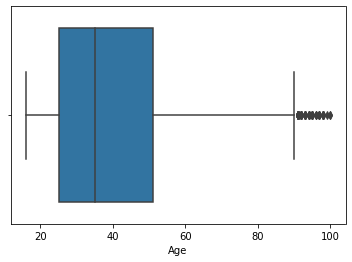

In [31]:
sns.boxplot(df.Age) #checking for outliers

In [32]:
df1 = df.copy()

Q1 = np.percentile(df.Age, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df.Age, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.Age.shape)
 
# Upper bound

upper = np.where(df.Age >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df.Age <= (Q1-1.5*IQR))

 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.Age.shape)

Old Shape:  (35158,)
New Shape:  (35054,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


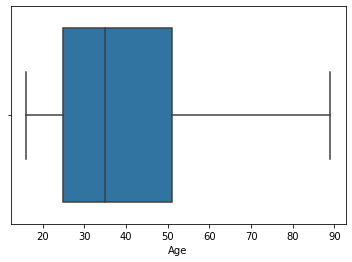

In [33]:
sns.boxplot(df.Age)

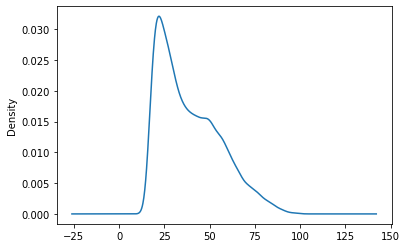

In [34]:
df1['Age'].plot(kind='kde')

### Next up on our feature list is vehicle speed

In [35]:
print('Speed')
print(df['Speed'].value_counts(normalize=True))
print()
print(df['Speed'].value_counts())

Speed
0.0     0.999874
30.0    0.000063
80.0    0.000063
Name: Speed, dtype: float64

0.0     15917
30.0        1
80.0        1
Name: Speed, dtype: int64


### 99.99% of our records contain 0 for vehicles speed, we are safe to drop it, there is no information to be gained from including it.

In [36]:
df=df.drop(['Speed'],axis=1)

In [37]:
print('VehicleDamage')
print(df['VehicleDamage'].value_counts(normalize=True))
print()
print(df['VehicleDamage'].value_counts())

VehicleDamage
Major             0.266902
Moderate          0.260484
Minor             0.201147
Unknown           0.173818
None              0.054259
Not Applicable    0.026901
Totaled           0.016489
Name: VehicleDamage, dtype: float64

Major             9356
Moderate          9131
Minor             7051
Unknown           6093
None              1902
Not Applicable     943
Totaled            578
Name: VehicleDamage, dtype: int64


### As we know from earlier, VehicleDamage has zero nulls. This is a categorical feature with 7 categories. We will use one-hot encoding for this as simple numerical encoding will not produce good results given the number of categories. Given that our new column names will correspond to our current feature categories, we will rename them with VD_categoryname before doing the encoding for readability purposes

In [38]:
df['VehicleDamage']=df['VehicleDamage'].replace(['Unknown'],"VD_Unknown")
df['VehicleDamage']=df['VehicleDamage'].replace(['Moderate'],"VD_Moderate")
df['VehicleDamage']=df['VehicleDamage'].replace(['Minor'],"VD_Minor")
df['VehicleDamage']=df['VehicleDamage'].replace(['Major'],"VD_Major")
df['VehicleDamage']=df['VehicleDamage'].replace(['None'],"VD_None")
df['VehicleDamage']=df['VehicleDamage'].replace(['Not Applicable'],"VD_N/A")
df['VehicleDamage']=df['VehicleDamage'].replace(['Totaled'],"VD_Totaled")
one_hot_vd = pd.get_dummies(df['VehicleDamage'])
df = df.drop('VehicleDamage',axis = 1)
df = df.join(one_hot_vd)

### Next up we have Party Category

In [39]:
print('PartyCategory')
print(df['PartyCategory'].value_counts(normalize=True))
print()
print(df['PartyCategory'].value_counts())

PartyCategory
Driver        0.938038
Bicycle       0.037114
Pedestrian    0.021909
Other         0.001626
Parked        0.001141
Unknown       0.000171
Name: PartyCategory, dtype: float64

Driver        32882
Bicycle        1301
Pedestrian      768
Other            57
Parked           40
Unknown           6
Name: PartyCategory, dtype: int64


### PartyCategory is a categorical variable describing the person's involvement in the accident. The categories are Driver, Parked, Bicycle, Pedestrian, Unknown, and Other. We know this feature has zero nulls and that Drivers make up the vast majority at 92%.
### We will handle this is in much the same way we handled the vehicledamage, doing one-hot encoding after renaming the categories.

In [40]:
df['PartyCategory']=df['PartyCategory'].replace(['Driver'],"PC_Driver")
df['PartyCategory']=df['PartyCategory'].replace(['Parked'],"PC_Parked")
df['PartyCategory']=df['PartyCategory'].replace(['Bicycle'],"PC_Bicycle")
df['PartyCategory']=df['PartyCategory'].replace(['Pedestrian'],"PC_Pedestrian")
df['PartyCategory']=df['PartyCategory'].replace(['Unknown'],"PC_Unknown")
df['PartyCategory']=df['PartyCategory'].replace(['Other'],"PC_Other")
one_hot_pc = pd.get_dummies(df['PartyCategory'])
df = df.drop('PartyCategory',axis = 1)
df = df.join(one_hot_pc)

### Our next feature is also categorical and likely will have major implications to our dataset: sobriety

In [41]:
print('Sobriety')
print(df['Sobriety'].value_counts(normalize=True))
print()
print(df['Sobriety'].value_counts())

Sobriety
Had Not Been Drinking                      0.628003
Impairment Not Known                       0.202117
Had Been Drinking - Under Influence        0.119986
Had Been Drinking - Not Under Influence    0.012980
Had Been Drinking - Impairment Unknown     0.012837
Sleepy/Fatigued                            0.011268
Under Drug Influence                       0.005021
Impairment Physical                        0.004907
Not Applicable                             0.002881
Name: Sobriety, dtype: float64

Had Not Been Drinking                      22014
Impairment Not Known                        7085
Had Been Drinking - Under Influence         4206
Had Been Drinking - Not Under Influence      455
Had Been Drinking - Impairment Unknown       450
Sleepy/Fatigued                              395
Under Drug Influence                         176
Impairment Physical                          172
Not Applicable                               101
Name: Sobriety, dtype: int64


### We will also be using one-hot encoding for this feature. For much the same reasons we have used one-hot encoding for most of the other categorical features. It will produce better results in the majority of our models. For the most part, our naming scheme is pretty good, even when they become the names of columns. The only one that needs to be changed is N/A.

In [42]:
df['Sobriety']=df['Sobriety'].replace(['Not Applicable'],"Sobriety_N/A")
one_hot_s = pd.get_dummies(df['Sobriety'])
df = df.drop('Sobriety',axis = 1)
df = df.join(one_hot_s)

### Our next feature is vehicle direction. Compass directions shouldn't matter when talking about vehicle accident severity. There **should** be no effect on any of our models depending on which direction one is heading. Theoretically this **should** be evenly distributed across all four categories, ignoring unknown values. With that being said, since we are looking at a limited geographical area, with a limited dataset, we likely will not see an even distribution across these categories. San Jose may have more dangerous freeways in the North/South directions we don't know until we look. Even further, this dataset does not contain time information but it will be joined to a dataset which does have time information. Theoretically we can create a feature based on sun direction. For example, we know the sun rises in the East and sets in the West, we could create a binary feature based on time and direction data that is basically "Driving in direction facing the sun" Those drivers with increased glare on their windshields might be more likely to be involved in an accident, and those accidents might be more severe. For those reasons, this feature stays, and will be one-hot encoded as well.

In [43]:
print('VehicleDirection')
print(df['VehicleDirection'].value_counts(normalize=True))
print()
print(df['VehicleDirection'].value_counts())

VehicleDirection
South             0.255121
North             0.251583
West              0.238860
East              0.234724
Unknown           0.016689
Not Applicable    0.003024
Name: VehicleDirection, dtype: float64

South             8943
North             8819
West              8373
East              8228
Unknown            585
Not Applicable     106
Name: VehicleDirection, dtype: int64


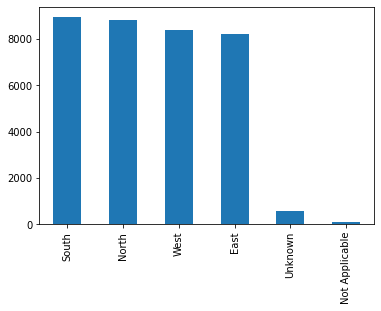

In [44]:
df['VehicleDirection'].value_counts().plot.bar()

### The theory of relatively even distributions is correct, more interestingly though is the East and West, the sun directions have very slightly lower counts of accident involvement than North and South.

In [45]:
df['VehicleDirection']=df['VehicleDirection'].replace(['Not Applicable'],"Direction_N/A")
df['VehicleDirection']=df['VehicleDirection'].replace(['Unknown'],"Direction_Unknown")
one_hot_direction = pd.get_dummies(df['VehicleDirection'])
df = df.drop('VehicleDirection',axis = 1)
df = df.join(one_hot_direction)

### Next on our list is PartyType, things like car, motorcycle, emergency_vehicle. This is another categorical feature with 20 categories. As the names of them are very self evident, we will only be renaming two of them 'unknown' and 'other'. These will be one-hot encoded as well, hence the renaming. Notably, there were two ice-cream trucks involved in accidents and 10 trains.

In [46]:
print('PartyType')
print(df['PartyType'].value_counts(normalize=True))
print()
print(df['PartyType'].value_counts())

PartyType
Car                       0.803874
Panel Truck               0.082758
Bicycle                   0.036173
Pedestrian                0.021310
Motorcycle/Moped          0.017915
Unknown                   0.012894
Semi Truck                0.007788
Emergency Vehicle         0.006818
Bus - Other               0.003537
Other                     0.002567
Skateboard                0.001341
Scooter Motorized         0.000913
Car With Trailer          0.000713
Wheelchair                0.000542
Bus - School              0.000371
Construction Equipment    0.000285
Scooter Non-Motorized     0.000114
Light Rail Vehicle        0.000057
Train                     0.000029
Name: PartyType, dtype: float64

Car                       28179
Panel Truck                2901
Bicycle                    1268
Pedestrian                  747
Motorcycle/Moped            628
Unknown                     452
Semi Truck                  273
Emergency Vehicle           239
Bus - Other                 124
Othe

In [47]:
df['PartyType']=df['PartyType'].replace(['Other'],"PartyType_Other")
df['PartyType']=df['PartyType'].replace(['Unknown'],"PartyType_Unknown")
one_hot_party = pd.get_dummies(df['PartyType'])
df = df.drop('PartyType',axis = 1)
df = df.join(one_hot_party)

### We have yet another categorical feature to encode. MovementPrecedingCollision is things like parking, driving straight, etc. We again will rename the catyegories that are not self-evident befor one-hot encoding the categories.

In [48]:
print('MovementPrecedingCollision')
print(df['MovementPrecedingCollision'].value_counts(normalize=True))
print()
print(df['MovementPrecedingCollision'].value_counts())

MovementPrecedingCollision
Proceeding Straight            0.506305
Making Left Turn               0.157243
Making Right Turn              0.077081
Entering Traffic               0.043932
Ran Off Road                   0.036287
Changing Lanes                 0.028870
Backing                        0.023649
Stopped                        0.020226
Other Unsafe Turning           0.018714
Making U-Turn                  0.018514
Traveling Wrong Way            0.013237
Slowing/Stopping               0.011725
Other (Ped)                    0.009785
Passing Other Vehicles         0.008587
Crossing Into Opposing Lane    0.006476
Unknown                        0.005648
Merging                        0.003794
Other                          0.003338
Parking Maneuver               0.003109
Other (Bike)                   0.001826
Parked                         0.001598
Stalled                        0.000057
Name: MovementPrecedingCollision, dtype: float64

Proceeding Straight            17748
Making

In [49]:
df['MovementPrecedingCollision']=df['MovementPrecedingCollision'].replace(['Other'],"MovementPrecedingCollision_Other")
df['MovementPrecedingCollision']=df['MovementPrecedingCollision'].replace(['Unknown'],"MovementPrecedingCollision_Unknown")
one_hot_MovementPrecedingCollision = pd.get_dummies(df['MovementPrecedingCollision'])
df = df.drop('MovementPrecedingCollision',axis = 1)
df = df.join(one_hot_MovementPrecedingCollision)

### It looks the highest instance (~40%) of the time, the party was proceeding straight before the accident.

### Our next categorical feature is "OtherAssociatedFactor" This feature has 32 categories. 55% of the accidents has N/A for other associated factors and 22% for Unknown with a further 13% for None Apparent. 90% of our data in this feature will not provide us with any useful information, but possible the remaining 10% is incredibly valuable. This has things like Stop and Go traffic. Its likely in a stop and go scenario any accidents are going to be extremely low speed, likely with low severity risk. It would be easy to dump this feature but it could be incredibly important and so it will again be one-hot encoded, with names adjusted and still included.

In [50]:
print('OtherAssociatedFactor')
print(df['OtherAssociatedFactor'].value_counts(normalize=True))
print()
print(df['OtherAssociatedFactor'].value_counts())

OtherAssociatedFactor
Not Applicable                 0.550009
Unknown                        0.145205
None Apparent                  0.126918
Other Violation                0.067096
Inattention                    0.049952
Speeding                       0.013807
Under Influence                0.009870
Other                          0.007874
Vision Obscurement             0.006162
Stop And Go Traffic            0.005705
Improper Turn                  0.004022
Unfamiliar With Road           0.002453
Entering/Leaving Ramp          0.001940
Defective Vehicle Equipment    0.001712
Uninvolved Vehicle             0.001369
Violation By Bike              0.001255
Improper Lane Change           0.000941
Previous Collision             0.000742
Violation By Pedestrian        0.000685
Other Improper Turn            0.000656
Runaway Vehicle                0.000485
Following Too Close            0.000257
Improper Passing               0.000200
Right Of Way                   0.000143
Improper Parking  

In [51]:
df['OtherAssociatedFactor']=df['OtherAssociatedFactor'].replace(['Other'],"OtherAssociatedFactor_Other")
df['OtherAssociatedFactor']=df['OtherAssociatedFactor'].replace(['Unknown'],"OtherAssociatedFactor_Unknown")
df['OtherAssociatedFactor']=df['OtherAssociatedFactor'].replace(['Not Applicable'],"OtherAssociatedFactor_N/A")
df['OtherAssociatedFactor']=df['OtherAssociatedFactor'].replace(['None Apparent'],"OtherAssociatedFactor_NoneApparent")
df['OtherAssociatedFactor']=df['OtherAssociatedFactor'].replace(['Other Violation'],"OtherAssociatedFactor_OtherViolation")
df['OtherAssociatedFactor']=df['OtherAssociatedFactor'].replace(['Under Influence'],"OtherAssociatedFactor_DUI")
one_hot_OtherAssociatedFactor = pd.get_dummies(df['OtherAssociatedFactor'])
df = df.drop('OtherAssociatedFactor',axis = 1)
df = df.join(one_hot_OtherAssociatedFactor)

In [52]:
df.shape

(35054, 110)

In [53]:
print('VehicleCount')
print(df['VehicleCount'].value_counts(normalize=True))
print()
print(df['VehicleCount'].value_counts())

VehicleCount
1    1.0
Name: VehicleCount, dtype: float64

1    35054
Name: VehicleCount, dtype: int64


### Vehicle Count has no nulls, the only problem with it is the only value in every single record is "1". There is absolutely zero information to gain from this feature so it is being dropped.

In [54]:
df = df.drop('VehicleCount',axis = 1)

### Our next feature is violation code. This is also categorical, with violations the party was cited for after the accident. We have 80 unique values here. There are 4 that are problematic: N/A, Unknown, 00001, 00002. 00001 and 00002 are not California violation codes. Those two will be changed to unknown and the whole thing will be hot encoded. The numbers as column titles will stay. With there being 80 unique categories in this feature, one-hot encoding will be more memory intensive than label encoding. With that being said, given our limited dataset and the potential model performance improvements, it is worth it. 

### Interestingly there is one violation 22521 which I believe was the cause of the accident "No person shall park a vehicle upon any railroad track or within 7 1/2 feet of the nearest rail." 

In [55]:
pd.set_option('display.max_columns', 100)  
pd.set_option('display.max_rows', 100)  
pd.set_option('display.max_colwidth', 100) 

In [56]:
 
print(df['ViolationCode'].value_counts().sort_index())
print(df['ViolationCode'].nunique())

00001              176
00002               23
12500              149
20002              223
21200               88
21202              211
21209               26
21235               10
21451               53
21453             3552
21456              119
21457               12
21460               93
21461               33
21650              517
21651              181
21657               53
21658              993
21663               93
21703              587
21712                4
21750               93
21751               10
21752                6
21753                8
21754                8
21755              175
21800              234
21801             1477
21802              900
21803               31
21804             1303
21806               32
21949               77
21950              813
21951                3
21952               39
21953                9
21954              394
21955              128
21956               53
22100              338
22101               52
22102      

In [57]:
df['ViolationCode']=df['ViolationCode'].replace(['00001'],"ViolationCode_Unknown")
df['ViolationCode']=df['ViolationCode'].replace(['Unknown'],"ViolationCode_Unknown")
df['ViolationCode']=df['ViolationCode'].replace(['Not Applicable'],"ViolationCode_N/A")
df['ViolationCode']=df['ViolationCode'].replace(['00002'],"ViolationCode_Unknown")

one_hot_ViolationCode = pd.get_dummies(df['ViolationCode'])
df = df.drop('ViolationCode',axis = 1)
df = df.join(one_hot_ViolationCode)

### Our final feature to clean is Violation Code Description. These values relate directly to the violation code, they will have nearly 100% correlation. It is improper to keep both. While these labels are far more descriptive, the length of these descriptions makes it so we would rather keep the violation codes as column names. This feature will be dropped.

In [58]:
print(df['ViolationCodeDescription'].value_counts().sort_index())
print(df['ViolationCodeDescription'].nunique())

Bad Brakes                                       11
Bald Tires                                        3
Child Safety/Belt                                 2
Condition/Brakes                                 13
Crossing Controlled Intersection/Jaywalking     128
Divided Highway                                 181
Driving Drunk                                  1619
Driving Drunk <21                                60
Driving Drunk With Injury                       249
Driving In Bike Lane                             26
Driving On Left                                   6
Driving On Sidewalk                              93
Driving Over Centerline                          93
Driving Wrong Side                              517
Duration/Signal                                   5
Fail Stop/Sign                                  480
Failure To Go On Green/Arrow                     53
Fell Asleep                                      23
Flashing Signal                                  12
Follow Too C

In [59]:
df = df.drop('ViolationCodeDescription',axis = 1)

In [60]:
pd.set_option('display.max_columns', 1000)  
pd.set_option('display.max_rows', 1000)  
pd.set_option('display.max_colwidth', 1000) 

In [61]:
df

,CrashName,Name,Age,F,M,Sex_Unknown,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Impairment Not Known,Impairment Physical,Sleepy/Fatigued,Sobriety_N/A,Under Drug Influence,Direction_N/A,Direction_Unknown,East,North,South,West,Bicycle,Bus - Other,Bus - School,Car,Car With Trailer,Construction Equipment,Emergency Vehicle,Light Rail Vehicle,Motorcycle/Moped,Panel Truck,PartyType_Other,PartyType_Unknown,Pedestrian,Scooter Motorized,Scooter Non-Motorized,Semi Truck,Skateboard,Train,Wheelchair,Backing,Changing Lanes,Crossing Into Opposing Lane,Entering Traffic,Making Left Turn,Making Right Turn,Making U-Turn,Merging,MovementPrecedingCollision_Other,MovementPrecedingCollision_Unknown,Other (Bike),Other (Ped),Other Unsafe Turning,Parked,Parking Maneuver,Passing Other Vehicles,Proceeding Straight,Ran Off Road,Slowing/Stopping,Stalled,Stopped,Traveling Wrong Way,DIS R1R/SIG,Defective Vehicle Equipment,Dis Control,Entering/Leaving Ramp,Following Too Close,Improper Lane Change,Improper Light,Improper Parking,Improper Passing,Improper Signal,Improper Turn,Inattention,Inva. Brakes,Lt of Center,Other Defect,Other Improper Turn,OtherAssociatedFactor_DUI,OtherAssociatedFactor_N/A,OtherAssociatedFactor_NoneApparent,OtherAssociatedFactor_Other,OtherAssociatedFactor_OtherViolation,OtherAssociatedFactor_Unknown,Previous Collision,Right Of Way,Runaway Vehicle,Speeding,Stop And Go Traffic,Unfamiliar With Road,Uninvolved Vehicle,Violation By Bike,Violation By Pedestrian,Vision Obscurement,12500,20002,21200,21202,21209,21235,21451,21453,21456,21457,21460,21461,21650,21651,21657,21658,21663,21703,21712,21750,21751,21752,21753,21754,21755,21800,21801,21802,21803,21804,21806,21949,21950,21951,21952,21953,21954,21955,21956,22100,22101,22102,22103,22105,22106,22107,22108,22109,22114,22350,22400,22450,22451,22500,22515,22517,22521,23101,23102,23103,23109,23116,23140,23152,23153,24002,24250,26452,26453,27360,27456,27465,29003,29004,ViolationCode_N/A,ViolationCode_Unknown
0,CR-0000064498,ACV-0000000032,50,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CR-0000068721,ACV-0000000033,19,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,CR-0000064227,ACV-0000000034,16,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,CR-0000064719,ACV-0000000035,63,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,CR-0000069173,ACV-0000000036,23,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
df.to_csv('cleaned_vehicles_2.csv')

In [63]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35054 entries, 0 to 35157
Columns: 183 entries, CrashName to ViolationCode_Unknown
dtypes: int64(1), object(2), uint8(180)
memory usage: 8.1+ MB


In [62]:
df.info